## Student Information
**Student ID** 25000148967

**GitHub Repository Link** https://github.com/robwhite-lis/Everything_Counts_Assessment_2

# Lone parent families 
## Lone parent families are economically disadvantaged.

In 2022 the IFS published a paper claiming that nearly half of children in lone parent families were in relative poverty. <https://ifs.org.uk/articles/pre-pandemic-relative-poverty-rate-children-lone-parents-almost-double-children-living-two>. This was a trend that had been increasing for almost a decade.

This notebook seeks to test the hypothesis that sex of the lone parent and social group are independent. 

This is a two tailed test as we are making no claims regarding if male or female single parents are more disadvantaged, only if there is a difference.

## Notes on the data
In the census data the field hh_families_type_6a = 4 indicates a  lone parent
The sex of the individual is noted by 1, female,  2 male
We will use approx_social_grade as a proxy for wealth. This is a range of 1 to 4. 1 is Upper Middle Class and 4 the lowest corresponding to the D and E socio economic classifications. This analysis will only classify focus on Group 4 (socio-economic groups DE).

In [9]:
# Here is the boiler plate code we use to read in the raw data from GitHub
#

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
# seaborn is a better tool for this with more examples 
import seaborn as sns


df_url = 'https://raw.githubusercontent.com/robwhite-lis/Everything_Counts_Assessment_2/refs/heads/main/census-2021-publicmicrodatateachingsample.csv'
url_content = requests.get(df_url, verify = False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

#Let's check we've got data
df

,resident_id_m,approx_social_grade,country_of_birth_3a,economic_activity_status_10m,ethnic_group_tb_6a,health_in_general,hh_families_type_6a,hours_per_week_worked,in_full_time_education,industry_10a,iol22cd,legal_partnership_status_6a,occupation_10a,region,religion_tb,residence_type,resident_age_7d,sex,usual_short_student
0,PTS000000588097,4,1,1,4,1,4,4,2,4,-8,1,5,E12000003,2,1,4,2,1
1,PTS000000000320,-8,1,5,4,2,1,-8,2,7,-8,1,2,E12000005,2,1,7,2,1
2,PTS000000397448,-8,2,5,4,2,1,-8,2,7,-8,1,3,E12000002,2,1,7,2,1
3,PTS000000082442,-8,1,5,4,3,2,-8,2,8,-8,2,8,E12000006,2,1,7,1,1
4,PTS000000016066,4,1,8,4,2,1,-8,2,9,-8,1,9,E12000002,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604346,PTS000000166524,-8,2,6,4,1,-8,-8,1,-8,-8,1,-8,E12000006,9,2,2,2,1
604347,PTS000000246489,2,1,1,4,2,2,3,2,5,-8,2,7,E12000002,2,1,6,1,1
604348,PTS000000177162,-8,1,9,4,2,-8,-8,2,-8,-8,1,-8,E12000001,2,2,6,1,1
604349,PTS000000377217,-8,1,6,4,1,-8,-8,1,7,-8,1,5,E12000001,1,2,2,2,1


In [10]:
# ... and the types of the data
df.dtypes

resident_id_m                   object
approx_social_grade              int64
country_of_birth_3a              int64
economic_activity_status_10m     int64
ethnic_group_tb_6a               int64
health_in_general                int64
hh_families_type_6a              int64
hours_per_week_worked            int64
in_full_time_education           int64
industry_10a                     int64
iol22cd                         object
legal_partnership_status_6a      int64
occupation_10a                   int64
region                          object
religion_tb                      int64
residence_type                   int64
resident_age_7d                  int64
sex                              int64
usual_short_student              int64
dtype: object

In [11]:
# Let's create a dataframe of just the lone parent families
# lpf == lone_parent_family
lpf = df[df['hh_families_type_6a'] == 4]
lpf.shape

(82801, 19)

In [12]:
# asg (approx social grade) cleansed data set with only the lone single parents that have an avg social grade
asg = lpf[lpf['approx_social_grade'] != -8]
asg.shape

(72981, 19)

In [13]:
# Add a descriptive value for male / female
asg['sex_desc'] = np.where(asg['sex'] ==1, 'Female', 'Male')

# Let's now charactarise the social groups some more between low and high. High will be 1,2 or 3, low will be 4. We are only interested in looking at any gender disparity in the lower socio-economic grouping
asg['asg_desc'] = np.where(asg['approx_social_grade'] == 4, 'Low', 'High')

asg

,resident_id_m,approx_social_grade,country_of_birth_3a,economic_activity_status_10m,ethnic_group_tb_6a,health_in_general,hh_families_type_6a,hours_per_week_worked,in_full_time_education,industry_10a,...,legal_partnership_status_6a,occupation_10a,region,religion_tb,residence_type,resident_age_7d,sex,usual_short_student,sex_desc,asg_desc
0,PTS000000588097,4,1,1,4,1,4,4,2,4,...,1,5,E12000003,2,1,4,2,1,Male,Low
18,PTS000000023084,1,1,-8,3,1,4,-8,-8,-8,...,-8,-8,E12000009,2,1,1,1,1,Female,High
26,PTS000000021151,4,1,-8,4,1,4,-8,1,-8,...,-8,-8,E12000009,1,1,1,2,1,Male,Low
45,PTS000000595075,2,2,2,1,1,4,4,2,5,...,2,5,E12000009,1,1,7,1,1,Female,High
50,PTS000000552053,3,1,2,4,2,4,1,2,7,...,1,9,E12000007,2,1,4,2,1,Male,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604201,PTS000000417995,2,1,7,4,1,4,-8,2,2,...,4,9,W92000004,1,1,4,1,1,Female,High
604283,PTS000000213913,4,1,2,1,2,4,3,2,6,...,1,8,E12000005,6,1,3,2,1,Male,Low
604289,PTS000000006673,4,1,-8,4,1,4,-8,-8,-8,...,-8,-8,E12000006,1,1,1,1,1,Female,Low
604308,PTS000000324124,4,1,1,2,2,4,3,2,5,...,1,4,E12000007,9,1,3,2,1,Male,Low


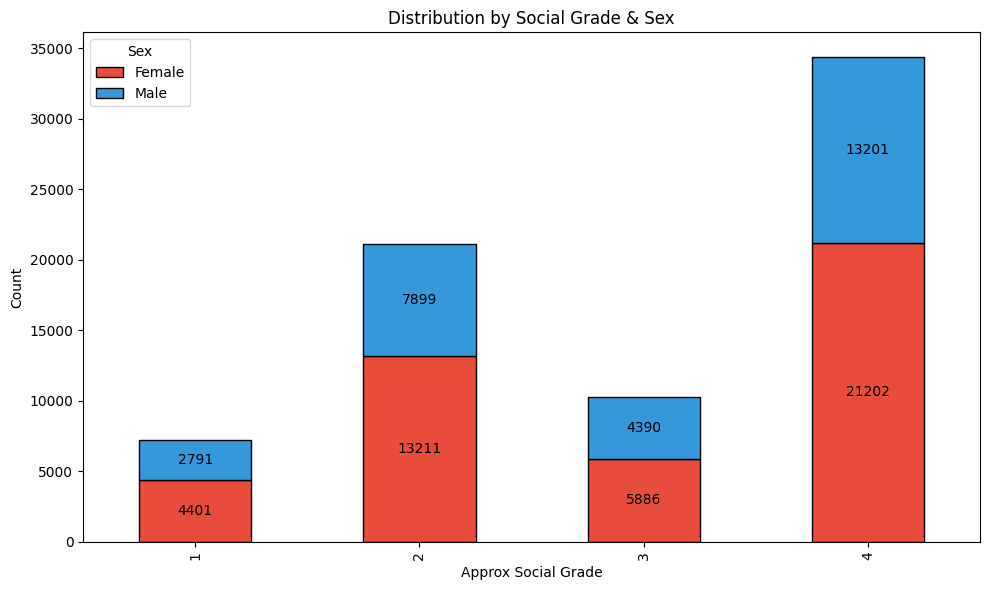

In [14]:
# Grouped bar chart
ax = asg.groupby(['approx_social_grade', 'sex_desc']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#e74c3c', '#3498db'],
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')
    

plt.xlabel('Approx Social Grade')
plt.ylabel('Count')
plt.title('Distribution by Social Grade & Sex')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Initial findings
From the visualisation above, it can be seen that lone parent households are skewed towards lower social groupings. 

We can see this if we compare the above distribution to the one for all household types across the approx socio-economic groupings. Here the distribution is more skewed towards B and C groups (Middle and Lower Middle class)

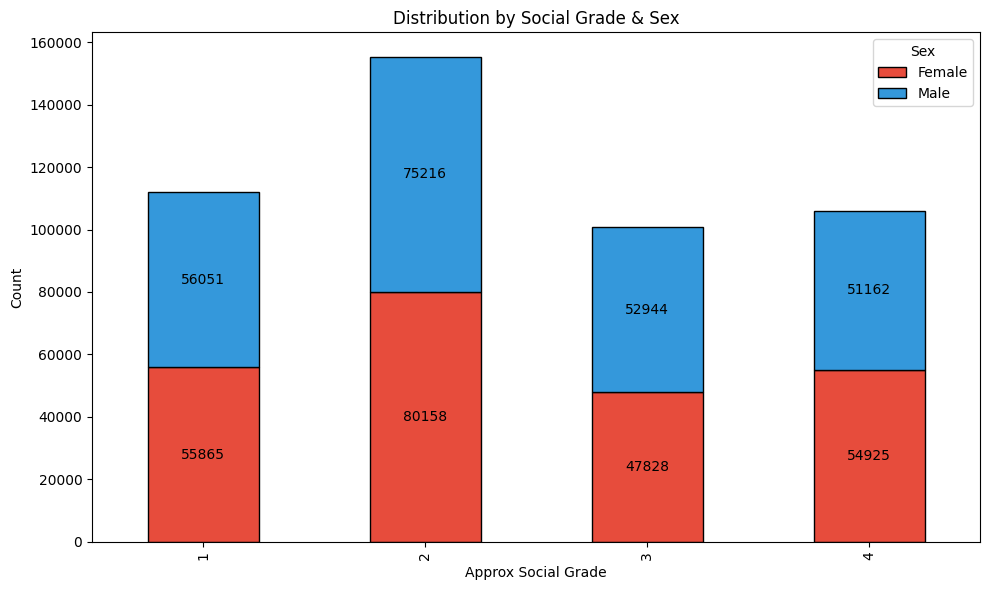

In [15]:
# Grouped bar chart accross all households
# oasg - all household types 

oasg = df[df['approx_social_grade'] != -8]
oasg['sex_desc'] = np.where(oasg['sex'] ==1, 'Female', 'Male')

ax2 = oasg.groupby(['approx_social_grade', 'sex_desc']).size().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#e74c3c', '#3498db'],
    edgecolor='black'
)



for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='center')
    

plt.xlabel('Approx Social Grade')
plt.ylabel('Count')
plt.title('Distribution by Social Grade & Sex')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()




In [16]:
# Build a contingency table
print(f"\nContingency Table:")
observed_table = pd.crosstab(asg['sex_desc'], asg['asg_desc'], margins=True)
print(observed_table)



Contingency Table:
asg_desc   High    Low    All
sex_desc                     
Female    23498  21202  44700
Male      15080  13201  28281
All       38578  34403  72981


We will now calculate the proportion of males and females in the Low socio-economic group

In [17]:
# Calculate the total number of males and females in my total sample
# Calculate the number of males and females in the low social group
n_female = (asg['sex_desc'] == 'Female').sum()
n_male = (asg['sex_desc'] == 'Male').sum()

female_low = ((asg['sex_desc'] == 'Female') & (asg['asg_desc'] == 'Low')).sum()
male_low = ((asg['sex_desc'] == 'Male') & (asg['asg_desc'] == 'Low')).sum()

prop_female_low = female_low / n_female
prop_male_low = male_low / n_male

observed_diff = prop_female_low - prop_male_low
print(observed_diff)

# 0.0075 is the prop diff, so x 100 give a % of 0.75% more females than males in my sample, is this chance?

0.007537856539916177


From the above we can see that the there are 0.75 more females than males in the results, is this chance or significant?

To test this we will use the computer to run a series of 10000 permutation tests. Essentially for each row in the dataframe that is classified in the Low socio-economic group we will assign male or female randomly. At the end of each iteration we will count the number of males and females. We will then work out the proportion of females and males as above and store the answer.  

In [18]:
# Now run the permutations

# Set number of permutations
n_permutations = 10000
np.random.seed(42)  # Setting the seed ensures reproducibility, not strictly necessary but helps when trying to debug

# Creates 2 numpy arrays, one for low social group and one for sex_label.
is_low = (asg['asg_desc'] == 'Low').values
sex_labels = asg['sex_desc'].values


print(f"Check extraction:")
print(f"sex_labels type: {sex_labels.dtype}")
print(f"sex_labels unique: {np.unique(sex_labels)}")
print(f"is_low type: {is_low.dtype}")
print(f"is_low has {is_low.sum()} True values")

# Create a numpy array to store results
permuted_diffs = np.zeros(n_permutations)


# Run permutations
# Each iteration of the loop will create a new diff between proportion of female and proportion of males in low social grouping.
for i in range(n_permutations):
    # Shuffle sex labels randomly
    permuted_sex = np.random.permutation(sex_labels)


    if i == 0:
        print(f"\nFirst permutation check:")
        print(f"permuted_sex unique: {np.unique(permuted_sex)}")
        female_mask = permuted_sex == 'Female'
        print(f"Female mask has {female_mask.sum()} Trues")
        print(f"is_low for females has {is_low[female_mask].sum()} Trues")

    
    # Calculate statistic for this permutation
    female_low_perm = is_low[permuted_sex == 'Female'].sum()
    male_low_perm = is_low[permuted_sex == 'Male'].sum()
    
    prop_female_perm = female_low_perm / n_female
    prop_male_perm = male_low_perm / n_male
    
    permuted_diffs[i] = prop_female_perm - prop_male_perm


    
    # Progress indicator
    if (i + 1) % 2000 == 0:
        print(f"  Completed {i + 1}/{n_permutations} permutations...")

print("Permutations complete!")



Check extraction:
sex_labels type: object
sex_labels unique: ['Female' 'Male']
is_low type: bool
is_low has 34403 True values

First permutation check:
permuted_sex unique: ['Female' 'Male']
Female mask has 44700 Trues
is_low for females has 21121 Trues
  Completed 2000/10000 permutations...
  Completed 4000/10000 permutations...
  Completed 6000/10000 permutations...
  Completed 8000/10000 permutations...
  Completed 10000/10000 permutations...
Permutations complete!


We now have a distribution and can now calculate the mean and standard deviation of the means of the distribution. From this we can calculate a p-value by comparing the mean of the randomised female / male differences to the one we observed. 

In [19]:
# Now calculate the p and z values
# Two-tailed p-value: how often do we see a difference as extreme or more extreme?
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print(f"\nObserved difference: {observed_diff:.4f}")
print(f"Mean of permutation distribution: {permuted_diffs.mean():.8f}")
print(f"Std of permutation distribution: {permuted_diffs.std():.8f}")
print(f"\nTwo-tailed p-value: {p_value:.8f}")

if p_value < 0.05:
    print(f"Result: STATISTICALLY SIGNIFICANT (p < 0.05)")
else:
    print(f"Result: NOT SIGNIFICANT (p >= 0.05)")

# Calculate how many standard deviations away
z_score = observed_diff / permuted_diffs.std()
print(f"\nZ-score equivalent: {z_score:.4f}")



Observed difference: 0.0075
Mean of permutation distribution: -0.00001857
Std of permutation distribution: 0.00382039

Two-tailed p-value: 0.04840000
Result: STATISTICALLY SIGNIFICANT (p < 0.05)

Z-score equivalent: 1.9731


From the above we can see that the result is statistically significant and that our observed proportional difference is more than one standard deviation from the mean (z > 1.96). This is easier to see graphically...


TypeError: 'Axes' object is not subscriptable

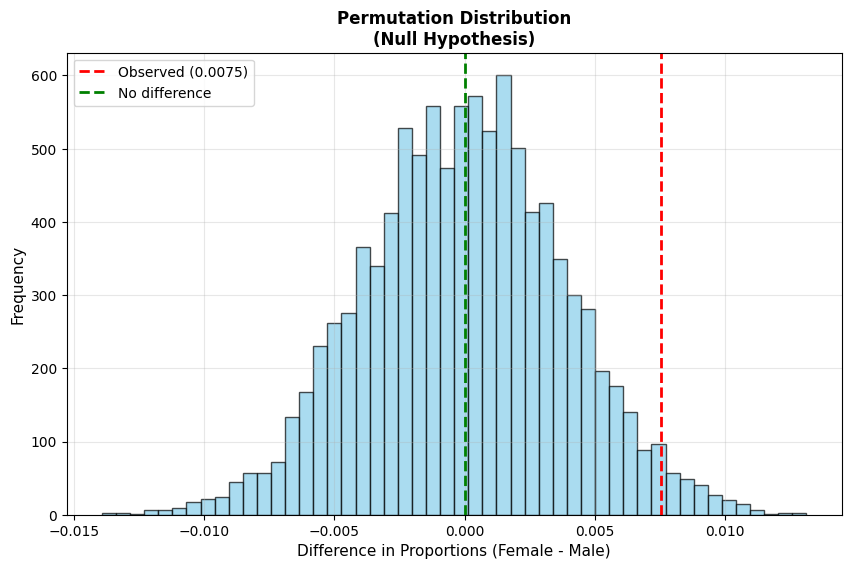

In [23]:
# Now do some visualisations

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig, ax = plt.subplots(figsize=(10,6))

# Plot 1: Histogram of permutation distribution
ax.hist(permuted_diffs, bins=50, alpha=0.7, edgecolor='black', color='skyblue')
ax.axvline(observed_diff, color='red', linestyle='--', linewidth=2, 
                label=f'Observed ({observed_diff:.4f})')
ax.axvline(0, color='green', linestyle='--', linewidth=2, 
                label='No difference')
ax.set_xlabel('Difference in Proportions (Female - Male)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Permutation Distribution\n(Null Hypothesis)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Add text box with p-value
textstr = f'p-value = {p_value:.4f}\nPermutations = {n_permutations}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

# Plot 2: Q-Q plot to check normality
#from scipy import stats
#stats.probplot(permuted_diffs, dist="norm", plot=axes[1])
#axes[1].set_title('Q-Q Plot\n(Check Normality of Permutation Distribution)', 
#                  fontsize=12, fontweight='bold')
# axes[1].grid(alpha=0.3)

plt.tight_layout()
#plt.savefig('permutation_test_asg_results.png', dpi=150, bbox_inches='tight')
# print("Visualization saved as 'permutation_test_asg_results.png'")
plt.show()


The analysis reveals a statistically significant association between sex and social group placement among lone parents. Female lone parents show slightly higher representation in the low social group (47.4% vs 46.7%), though the effect size is negligible